In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

In [ ]:
df=pd.read_csv("/content/Simple RFM Customer Segmentation - K Means Practice.csv")

In [ ]:
df.head()

,customer_id,monetary_purchase_amt,frequency_purchase,recency_of_purchase
0,1,3.097321,18.795885,15.108402
1,2,8.759256,21.893389,13.801586
2,3,16.634326,4.270323,23.046506
3,4,10.934102,22.335917,15.445987
4,5,13.832831,22.255416,16.896821


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            300 non-null    int64  
 1   monetary_purchase_amt  300 non-null    float64
 2   frequency_purchase     300 non-null    float64
 3   recency_of_purchase    300 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 9.5 KB


In [ ]:
df.shape

(300, 4)

In [ ]:
df.isnull().sum()

,0
customer_id,0
monetary_purchase_amt,0
frequency_purchase,0
recency_of_purchase,0


In [ ]:
(df==0).sum()

,0
customer_id,0
monetary_purchase_amt,0
frequency_purchase,0
recency_of_purchase,0


In [ ]:
#Feature selection
X=df[["monetary_purchase_amt","frequency_purchase","recency_of_purchase"]]

In [ ]:
#Data Preprocessing
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-1.58194744e+00,  7.33524824e-01,  2.89606613e-01],
       [-4.82876548e-01,  1.10586376e+00,  7.52018273e-02],
       [ 1.04579854e+00, -1.01253618e+00,  1.59198328e+00],
       [-6.07048042e-02,  1.15905827e+00,  3.44992862e-01],
       [ 5.01984282e-01,  1.14938160e+00,  5.83026211e-01],
       [-1.27155571e-01,  1.20468950e+00,  5.49509808e-01],
       [ 3.67928453e-01, -6.09635604e-01, -1.29981922e+00],
       [-9.99295286e-02,  1.17584394e+00,  2.47517989e-01],
       [ 6.37756192e-01, -8.76105143e-01, -1.47470140e+00],
       [-1.14697464e+00,  9.83495511e-01, -3.40469330e-02],
       [ 1.05405116e+00, -1.09316252e+00,  1.05832819e+00],
       [ 7.75931409e-01, -1.26636655e+00,  9.55632299e-01],
       [-1.76439410e-01,  1.14816679e+00,  5.74410359e-01],
       [ 6.37312910e-01, -5.82073651e-01, -1.20533322e+00],
       [-1.58946839e+00,  7.73660091e-01, -2.47781179e-02],
       [ 1.03793244e+00, -1.11838864e+00,  8.96817131e-01],
       [-1.52217799e+00,  8.44734010e-01

In [ ]:
X_train,X_test=train_test_split(X_scaled,test_size=0.2,random_state=42)

In [ ]:
#Elbow methdo to find optimal number of clusters
wcss=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)


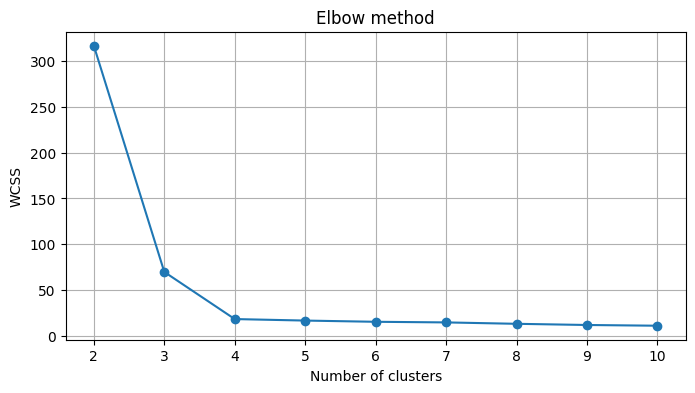

In [ ]:
plt.figure(figsize=(8,4))
plt.title("Elbow method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(range(2,11),wcss,marker="o")
plt.grid(True)
plt.show()

In [ ]:
#Apply kmeans with optimal number of clusters
kmeans=KMeans(n_clusters=4,init="k-means++",random_state=42)
df["Cluster"]=kmeans.fit_predict(X_scaled)

In [ ]:
df.head()
df["Cluster"].value_counts()

,count
Cluster,
1,75
3,75
2,75
0,75


In [ ]:
# Interpreting the Silhouette Score: Range: The score is between -1 and 1.
#Closer to 1: The clusters are well-separated and compact (good clustering).
#Closer to 0: The clusters are overlapping or poorly defined.
#Negative: Your clusters are likely incorrect (points might be assigned to the wrong cluster).
#Silhouette score
sil_score=silhouette_score(X_scaled,df["Cluster"])
print(f"Silhouette Score:{sil_score: .3f}")

Silhouette Score: 0.795


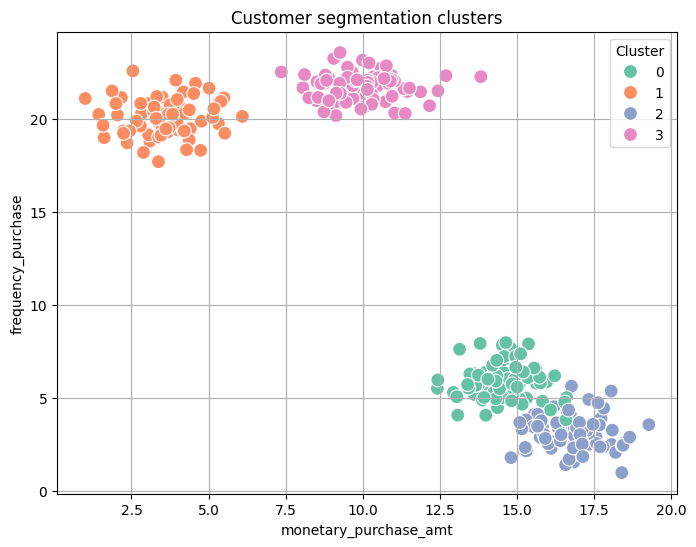

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="monetary_purchase_amt",y="frequency_purchase",hue="Cluster",palette="Set2",data=df,s=100)
plt.title("Customer segmentation clusters")
plt.grid(True)
plt.show()

In [ ]:
#Cross validation
